In [40]:
import pandas as pd # used for data cleaning and analysis
import numpy as np
import matplotlib.pyplot as plt # for designed to be as usable as MATLAB
import seaborn as sns # for statistical graphics
from sklearn.model_selection import train_test_split  # for analyze data
from sklearn.tree import DecisionTreeClassifier # used for classification and Regression problems
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve,precision_score,recall_score # for Confusion Matrix

In [2]:
df=pd.read_csv("heart failure.csv") # Read CSV file to Dataframe

In [3]:
df.head() # display first 5 row data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape # for view Data Shape

(299, 13)

In [5]:
df.info() # for information every column individual way

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.DEATH_EVENT.value_counts() # count  Unique Value oN DEATH_EVENT COlumn 

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [7]:
96/(96+203) # Ratio of Death

0.3210702341137124

In [8]:
203/(96+203) # Ratio of Alive

0.6789297658862876

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

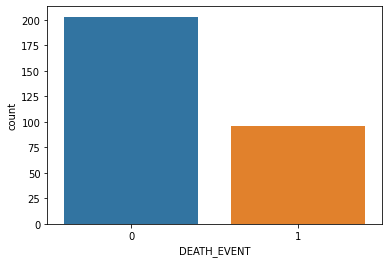

In [10]:
sns.countplot(x='DEATH_EVENT',data=df) # for Graphical View oNly Death Event

<AxesSubplot:xlabel='anaemia', ylabel='count'>

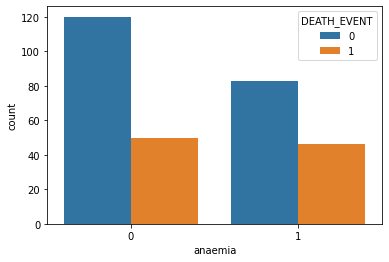

In [11]:
sns.countplot(x='anaemia',data=df,hue='DEATH_EVENT') # for Compare With  Anaemia and show Grapical View 

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

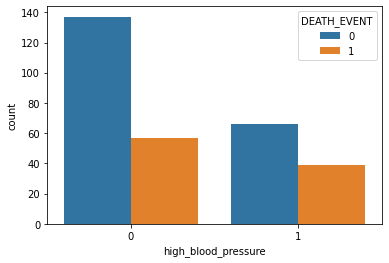

In [12]:
sns.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT') # for Compare With  High Blood Pressure and show Grapical View 

In [14]:
df.describe() # for Describe Each Column On Count,Mean,Stdandart Divition,Min,First Quartile,Second Quartile, Third Quartile, Max

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [16]:
x=df.drop('DEATH_EVENT',axis=1) # for Remove Death Event Column and generate New Data Frame and put On X

In [17]:
y=df['DEATH_EVENT'] # save All Death Event Data or Actual Y 

In [19]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,random_state=42,test_size=.3) 

# here Split Data.  Test data 30% and Training Data 70%

In [20]:
xTrain.shape # for show Training data shape

(209, 12)

In [21]:
clf=DecisionTreeClassifier() # for create A Object for Decision Tree Classifier

In [22]:
clf.fit(xTrain,yTrain) # for Fit Training Data 

DecisionTreeClassifier()

In [23]:
clf.predict(xTest) # for generate Predicted Result On Test Data and display it

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

In [25]:
np.array(yTest) # it is Actual Y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

# Confused Matrix

In [26]:
pred=clf.predict(xTest) # for generate Predicted Y and store data On Pred Variable

In [27]:
print(classification_report(yTest,pred)) # for Print Classification Report

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



In [28]:
confusion_matrix(yTest,pred) # For SHow Confused Matrix

array([[42, 11],
       [19, 18]], dtype=int64)

In [29]:
tp,fn,fp,tn=confusion_matrix(yTest,pred).reshape(-1) # here Array Data Store On Variable 

# Accuracy

In [33]:
accuracy=(tp+tn)/(tp+tn+fp+fn) # generate Accuracy using formula
accuracy # print Accuracy Result

0.6666666666666666

In [34]:
accuracy_score(yTest,pred) # calculate Accuracy using Library

0.6666666666666666

# Precision

In [35]:
precision=tp/(tp+fp) # generate Precision using formula
precision # print Precision Result

0.6885245901639344

# True Positive Rate/ Sensitivity/ Recall/ Hit Rate 

In [38]:
TPR=tp/(tp+fn)
TPR

0.7924528301886793

# False Positive Rate / 1-Specificity

In [39]:
fpr=fp/(tn+fp)
fpr

0.5135135135135135

# Recall 

In [42]:
recall=recall_score(yTest,pred)
recall

0.4864864864864865

# Harmonic Mean /F1 Score

In [43]:
f1=(2*precision*recall)/(precision+recall)
f1

0.5701357466063348

# Threat Score (TS) / Critical Success Index (CSI)

In [44]:
csi=tp/(tp+fn+fp)
csi

0.5833333333333334

# False Discovery Rate (FDR)

In [45]:
fdr=fp/(tp+fp)
fdr

0.3114754098360656

# Specificity/ Selectivity/ True Negative Rate (TNR)

In [46]:
tnr=tn/(tn+fp)
tnr

0.4864864864864865

# Receiver Operating Characteristics (ROC) Curve
# Area Under The Curve (AUC)

C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


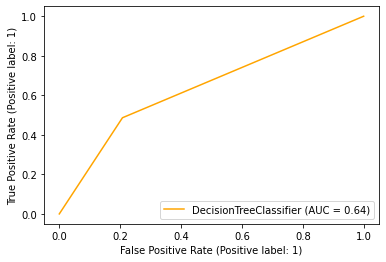

In [47]:
plot_roc_curve(clf,xTest,yTest,color='orange') # here Generate A ROC CUrve using xTest and yTest with Classification Algorithm

C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


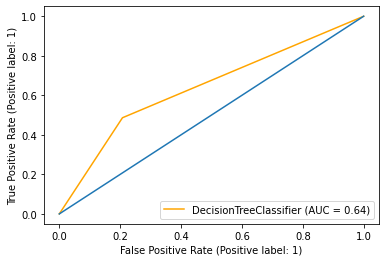

In [48]:
plot_roc_curve(clf,xTest,yTest,color='orange')  
plt.plot([0,1],[0,1]) # if we want to Draw Middle Line on Graph

# Thanks for Watching